# DIY Covid-19 Dashboard

Below are two graphs showing the number of new cases, number of new hospital admissions and number of new deaths. All are plotted by date.

In [471]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [472]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

In [473]:
filters = [
    'areaType=nation', 
    'areaName=Scotland'
]

structure = {
    "date": "date",
    "cases": "newCasesBySpecimenDateRollingRate",
    "hospital": "newAdmissionsRollingRate",
    "deaths": "newDailyNsoDeathsByDeathDate" 
}

In [474]:
api = Cov19API(filters=filters, structure=structure)

In [475]:
timeseries=api.get_json()

In [476]:
#print(timeseries)

In [477]:
with open("timeseries.json", "wt") as OUTF:
    json.dump(timeseries, OUTF)

In [478]:
jsondata={"date": "date",
    "cases": "newCasesBySpecimenDateRollingRate",
    "hospital": "newAdmissionsRollingRate",
    "deaths": "newDailyNsoDeathsByDeathDate" }

In [479]:
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)

In [480]:
#data

In [481]:
datalist=data['data']
#datalist

In [482]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
#dates

In [483]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [484]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
#print (startdate, ' to ', enddate)

In [485]:
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['cases', 'hospital', 'deaths'])
#timeseriesdf

In [486]:
for entry in datalist:
    date=parse_date(entry['date'])
    for column in ['cases', 'hospital', 'deaths']:
        if pd.isna(timeseriesdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            timeseriesdf.loc[date, column]=value
 
timeseriesdf.fillna(0.0, inplace=True)
            
#timeseriesdf

<Axes: >

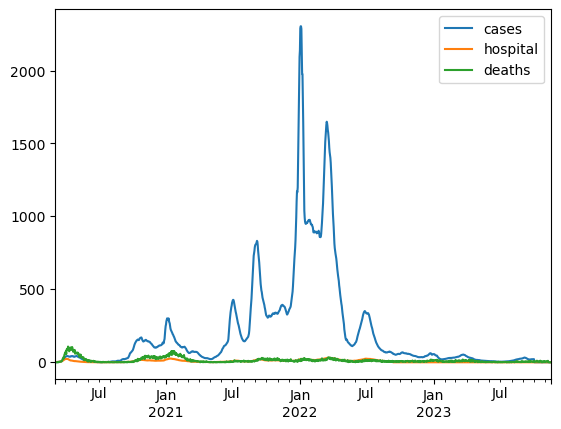

In [487]:
timeseriesdf.plot() 

The above graph is linear.

<Axes: >

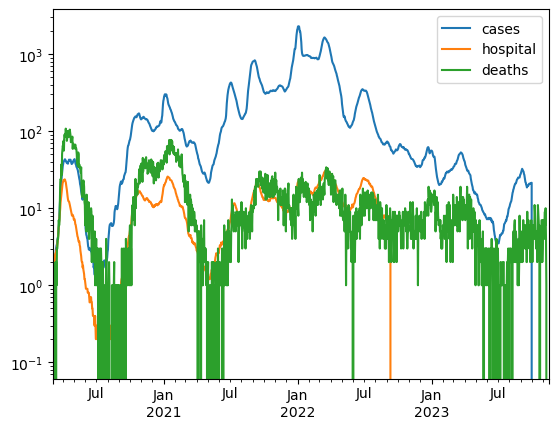

In [488]:
timeseriesdf.plot(logy=True)

This graph is the same as the above but plotted using a log scale.

### A comparison of hospital admissions with ventilator bed occupancy

In [489]:
filters = [
    'areaType=nation',
    'areaName=Scotland'
]

structure = {
    "date": "date",
    "hospital": "newAdmissionsRollingRate", #Rate of new patients admitted to hospital with COVID-19 per 100,000 people in the rolling 7-day period ending on the dates shown.

    "OMVbed": "covidOccupiedMVBeds" #The number of COVID-19 patients in mechanical ventilated beds.
}

api = Cov19API(filters=filters, structure=structure)

In [490]:
hospbed=api.get_json()

In [491]:
#print(hospbed)

In [492]:
with open("hospbed.json", "wt") as OUTF:
    json.dump(hospbed, OUTF)

In [493]:
jsondata1= {
    "date": "date",
    "hospital": "newAdmissionsRollingRate", 
    "OMVbed": "covidOccupiedMVBeds" 
}

In [494]:
with open("hospbed.json", "rt") as INFILE:
    data=json.load(INFILE)

In [495]:
#data

In [496]:
datalist=data['data']
#datalist

In [497]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()
#dates

In [498]:
def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

In [499]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
#print (startdate, ' to ', enddate)

In [500]:
index=pd.date_range(startdate, enddate, freq='D')
hospbeddf=pd.DataFrame(index=index, columns=['hospital', 'OMVbed'])
#hospbeddf

In [501]:
for entry in datalist:
    date=parse_date(entry['date'])
    for column in ['hospital', 'OMVbed']:
        if pd.isna(hospbeddf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            hospbeddf.loc[date, column]=value
 
hospbeddf.fillna(0.0, inplace=True)
            
#hospbeddf

<Axes: >

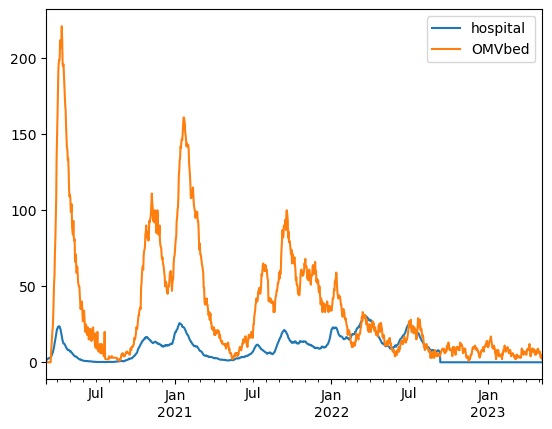

In [502]:
hospbeddf.plot()

This is a linear graph showing the number of new hospital admissions and ventilator bed occupancy over time.

<Axes: >

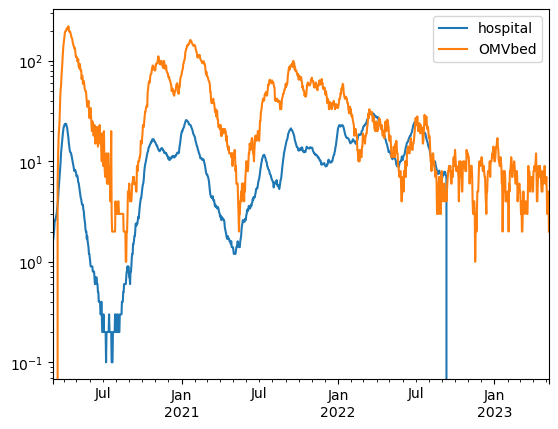

In [503]:
hospbeddf.plot(logy=True)

This is a logarithamic graph of the one above.

In [504]:
# hospbeddf.plot(logy=True, kind='bar', y=['hospital','OMVbed'])

### MaleVsFemales Age Distribution in Wales

In [505]:
filters = [
    'areaType=nation',
    'areaName=Wales'
]

structure = {
    "males": "maleCases",
    "females": "femaleCases"
}

In [506]:
api = Cov19API(filters=filters, structure=structure)

In [507]:
idk=api.get_json()

In [508]:
#print(idk)

In [509]:
with open("idk.json", "wt") as OUTF:
    json.dump(idk, OUTF)

In [510]:
jsondata2= {
    "males": "maleCases",
    "females": "femaleCases"
}

In [511]:
with open("idk.json", "rt") as INFILE:
    data=json.load(INFILE)

In [512]:
#data

In [513]:
datadic=data['data'][0] # data['data'] is a list
#datadic

In [514]:
males=datadic['males']
females=datadic['females']
# males
# females

In [515]:
ageranges=[x['age'] for x in males] # each entry of males is a dictionary
#print(ageranges)

In [516]:
def min_age(agerange):
    agerange=agerange.replace('+','') 
    start=agerange.split('_')[0]
    return int(start)

# print(min_age('85_to_89'))
# print(min_age('90+'))

In [517]:
ageranges.sort(key=min_age)
# print (ageranges)

In [518]:
idk_df=pd.DataFrame(index=ageranges, columns=['males','females', 'total'])

In [519]:
for entry in males: 
    ageband=entry['age'] 
    idk_df.loc[ageband, 'males']=entry['value']
    
for entry in females:
    ageband=entry['age']
    idk_df.loc[ageband, 'females']=entry['value']

idk_df['total']=idk_df['males']+idk_df['females']

<Axes: >

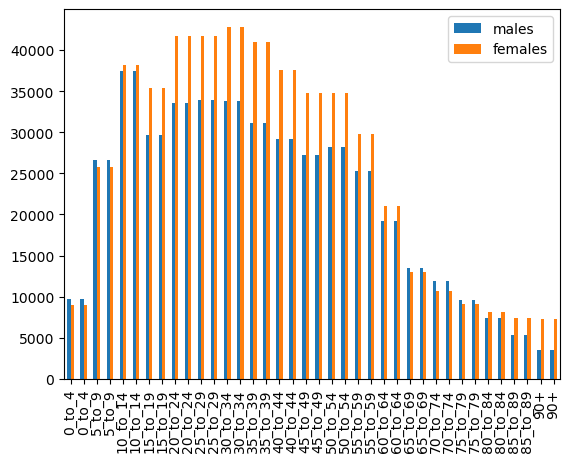

In [520]:
idk_df.plot(kind='bar', y=['males','females'])

Male and Females Age Distribution of cases in Wales

<Axes: >

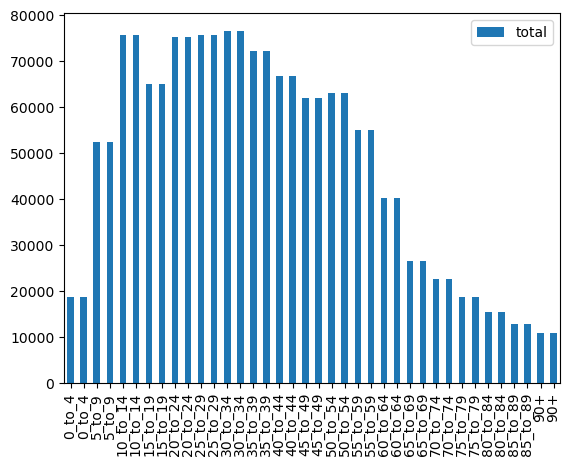

In [521]:
idk_df.plot(kind='bar', y='total')

Male and Females Age Distribution of cases in Wales.

In [522]:
timeseriesdf.to_pickle("timeseriesdf.pkl")
hospbeddf.to_pickle("hospbed.pkl")
idk_df.to_pickle("hospbed.pkl")

In [523]:
# ## Load initial data from disk

# You should include "canned" data in ```.json``` files along with your dashboard. When the dashboard starts, it should load that data and assign it as a dictionary to the ```jsondata``` variable (the code below will be hidden when the dashboard is rendered by Voila).

In [524]:
# Load JSON files and store the raw data in some variable. Edit as appropriate
jsondata={"date": "date",
    "cases": "newCasesBySpecimenDateRollingRate",
    "hospital": "newAdmissionsRollingRate",
    "deaths": "newDailyNsoDeathsByDeathDate" }

#data from disc, put it ina  global variable - should not be empty as the cell is now

In [525]:
# ## Wrangle the data

# The dashboard should contain the logic to wrangle the raw data into a ```DataFrame``` (or more than one, as required) that will be used for plotting. The wrangling code should be put into a function and called on the data from the JSON file (we'll need to call it again on any data downloaded from the API).  In this template, we just pretend we are wrangling ```rawdata``` and instead generate a dataframe with some random data

In [526]:
def wrangle_data(rawdata):
    """Parameters: rawdata - data from json file or API call. Returns a dataframe."""
    # Assuming your rawdata is a dictionary with the structure specified
    data = rawdata['data']
    dates = [entry['date'] for entry in data]
    hospital_values = [entry['hospital'] for entry in data]
    omvbed_values = [entry['OMVbed'] for entry in data]

    hospbeddf = pd.DataFrame({'date': dates, 'hospital': hospital_values, 'OMVbed': omvbed_values})
    hospbeddf['date'] = pd.to_datetime(hospbeddf['date'])
    hospbeddf.set_index('date', inplace=True)
    
    return hospbeddf

In [527]:
## Download current data

In [528]:
# Give your users an option to refresh the dataset - a "refresh" button will do. The button callback should
# * call the code that accesses the API and download some fresh raw data;
# * wrangle that data into a dataframe and update the corresponding (global) variable for plotting (here, ```df```);
# * optionally: force a redraw of the graph and give the user some fredback.

# Once you get it to work, you may want to wrap your API call inside an exception handler, so that the user is informed, the "canned" data are not overwritten and nothing crashes if for any reason the server cannot be reached or data are not available.

# After you refresh the data, graphs will not update until the user interacts with a widget. You can trick ```iPywidgets``` into redrawing the graph by simulating interaction, as in the ```refresh_graph``` function we define in the Graph and Analysis section below.

# In this example, clicking on the button below just generates some more random data and refreshes the graph. The button should read *Fetch Data*. If you see anything else, take a deep breath :)

In [529]:
# # Place your API access code in this function. Do not call this function directly; it will be called by 
# # the button callback. 
# def access_api():
#     """ Accesses the PHE API. Return data as a like-for-like replacement for the "canned" data loaded from the JSON file. """
#     api = Cov19API(filters=filters, structure=structure)
#     return {api.get_json} # return data read from the API

In [530]:
# def api_button_callback(button):
#     """Button callback - it must take the button as its parameter (unused in this case).
#     Accesses API, wrangles data, updates global variable df used for plotting."""
#     apidata = access_api()
   
#     global df
#     df = wrangle_data(apidata)
    
#     refresh_graph()
    
#     apibutton.icon = "check"
#     # apibutton.disabled = True

# # Create the button
# apibutton = wdg.Button(
#     description='Refresh Data',
#     disabled=False,
#     button_style='info',
#     tooltip="Click to refresh data",
#     icon='refresh'
# )

# apibutton.on_click(api_button_callback)

# display(apibutton)


## Graphs and Analysis

The graph from - A comparison of hospital admissions with ventilator bed occupancy - now with interactive sliders and data refresher.

In [531]:

filters = ['areaType=nation', 'areaName=Scotland']
structure = {
    "date": "date",
    "hospital": "newAdmissionsRollingRate", 
    "OMVbed": "covidOccupiedMVBeds" 
}

api = Cov19API(filters=filters, structure=structure)
jsondata = api.get_json()


startdate = '2023-01-01'
enddate = '2023-01-31'


df = wrangle_data(jsondata)

def plot_hospital_data(column):
    """ Plotting function for hospital data """
    df[column].plot(title=f'Hospital Admissions vs Ventilator Bed Occupancy: {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()


column_selector = wdg.Dropdown(
    options=['hospital', 'OMVbed'],
    value='hospital',
    description='Select Data: ',
    disabled=False,
)

size_slider = wdg.IntSlider(
    min=150,
    max=900,
    step=50,
    value=600,
    description='Graph Size:',
    continuous_update=False,
    readout=False,
)

# Refresh button to update the graph with new data
refresh_button = wdg.Button(
    description='Refresh Data',
    disabled=False,
    button_style='info',
    tooltip="Click to refresh data",
    icon='refresh'
)

def refresh_data(button):
    global df
    # Perform API call and data wrangling
    api = Cov19API(filters=filters, structure=structure)
    jsondata = api.get_json()
    df = wrangle_data(jsondata)
    # Update the graph
    refresh_graph()

refresh_button.on_click(refresh_data)

def refresh_graph():
    current = column_selector.value
    other = 'OMVbed' if current == 'hospital' else 'hospital'
    column_selector.value = other  # Forces the redraw
    column_selector.value = current  # Change it back to trigger the update


graph = wdg.interactive_output(plot_hospital_data, {'column': column_selector})


display(wdg.HBox([column_selector, refresh_button]), graph, size_slider)


# display(column_selector, refresh_button, size_slider, graph)


Output()

IntSlider(value=600, continuous_update=False, description='Graph Size:', max=900, min=150, readout=False, step…

**Author and Copyright Notice** Remember that if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge your sources: Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england) and on the [DIY Covid Dashboard Kit](https://github.com/fsmeraldi/diy-covid19dash), Copyright (C) Fabrizio Smeraldi 2020,2023. Released under the [GNU GPLv3.0 or later](https://www.gnu.org/licenses/).